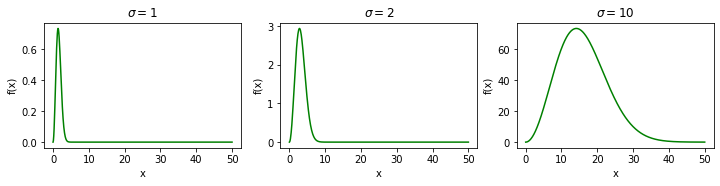

In [29]:
import numpy as np
import matplotlib.pylab as plt

def f(x,sigma):
    y = x**2*np.exp(-(x**2)/(2*sigma**2))
    return y

Sigma = [1,2,10]
x = np.linspace(0,50,500)
plt.figure(figsize=(12,2.3))
for s in Sigma:
    plt.subplot(1,3,Sigma.index(s)+1)
    plt.plot(x,f(x,s),c='g')
    plt.title('$\sigma= $'+str(s))
    plt.ylabel('f(x)')
    plt.xlabel('x')

plt.savefig('mb.png')

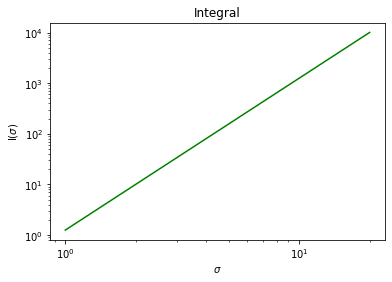

In [31]:
def gauss(f,sigma,N):
    integral = 0
    x0, w0 = np.polynomial.legendre.leggauss(N+1)
    x = (1+x0)/(1-x0)
    w = 2*w0/(1-x0)**2
    integral = sum(f(x,sigma)*w)
    return integral

Sigma2 = np.linspace(1,20,100)
I = []
for s in Sigma2:
    I.append(gauss(f,s,100))

plt.figure()
plt.plot(Sigma2,I,c='g')
plt.loglog()
plt.xlabel('$\sigma$')
plt.ylabel('I$(\sigma)$')
plt.title('Integral')
plt.savefig('mb_int.png')

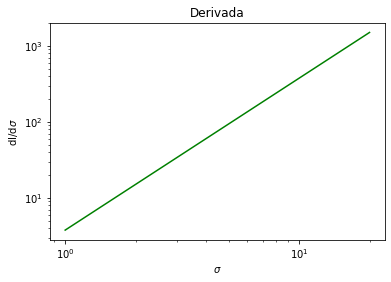

In [30]:
def cD(f,g,h,t):
    cd = (f(g,(t+h/2),100)-f(g,(t-h/2),100))/h
    return cd

dI = []
for s in Sigma2:
    dI.append(cD(gauss,f,0.05,s))

plt.figure()
plt.plot(Sigma2,dI,c='g')
plt.loglog()
plt.xlabel('$\sigma$')
plt.ylabel('dI/d$\sigma$')
plt.title('Derivada')
plt.savefig('mb_int_prime.png')